In [103]:
#importing the libraries
import pandas as pd
import numpy as np               # For mathematical calculations
import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline
import warnings                  # To ignore any warnings
warnings.filterwarnings("ignore")

In [104]:
#Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [105]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [106]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [107]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [108]:
train.dtypes
# object = categorical variables

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [109]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [110]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [111]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

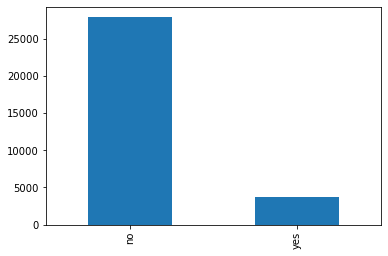

In [112]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

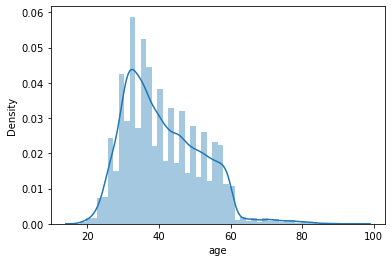

In [113]:
sns.distplot(train["age"])

<AxesSubplot:>

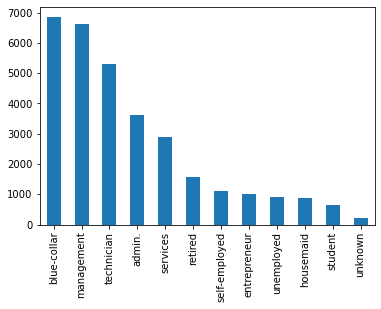

In [114]:
train['job'].value_counts().plot.bar()
#most of the clients belong to blue-collar job and students are least as students don't generally take a term deposit.

# Model Building

In [115]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [116]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# splitting the train data. 20% data in validation and rest in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
# defining the logistic regression model
lreg = LogisticRegression()

In [121]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [122]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8928909952606635